# Demand Calibration — Post-Calibration Visualisation

This notebook visualises calibrated demand models produced by
`test_demand_calibration.py`.  All heavy-lifting functions (data
loading, filtering, BAIT computation, plotting) are imported from that
script so there is no code duplication.

**Contents**

| Section | Description |
|---------|-------------|
| 1 | Imports & setup |
| 2 | Single-country analysis (filtering, demand curve, BAIT) |
| 3 | Multi-country summary (parameters, demand curves) |
| 4 | Network summary (buses, lines, generators) |
| 5 | Standalone legend |

## 1. Imports & Setup

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

sys.path.append(os.path.join(os.getcwd(), ".."))
from data_config import *
from utils.demand_utils import _bait, compute_rmse, compute_mape
from utils.network_process_utils import load_network_EU, load_demand_profile

# Reuse pipeline functions from the calibration script
from test_demand_calibration import (
    load_and_filter_country_data,
    load_weather_and_network_data,
    prepare_training_data,
    visualize_filtering_results,
    visualize_demand_curve,
    visualize_temp_bait_relationship,
)

sns.set_style('white')
warnings.filterwarnings('ignore')

## 2. Single-Country Analysis

### 2.1 Configuration

In [2]:
COUNTRIES = ['PT', 'ES', 'FR', 'IT', 'DE', 'BE', 'NL', 'GB']

selected_country = 'FR'
year_list = [2015, 2024]
cali_year_list = [2015, 2024]  # calibration period (for model path)

### 2.2 Outlier Filtering Preview

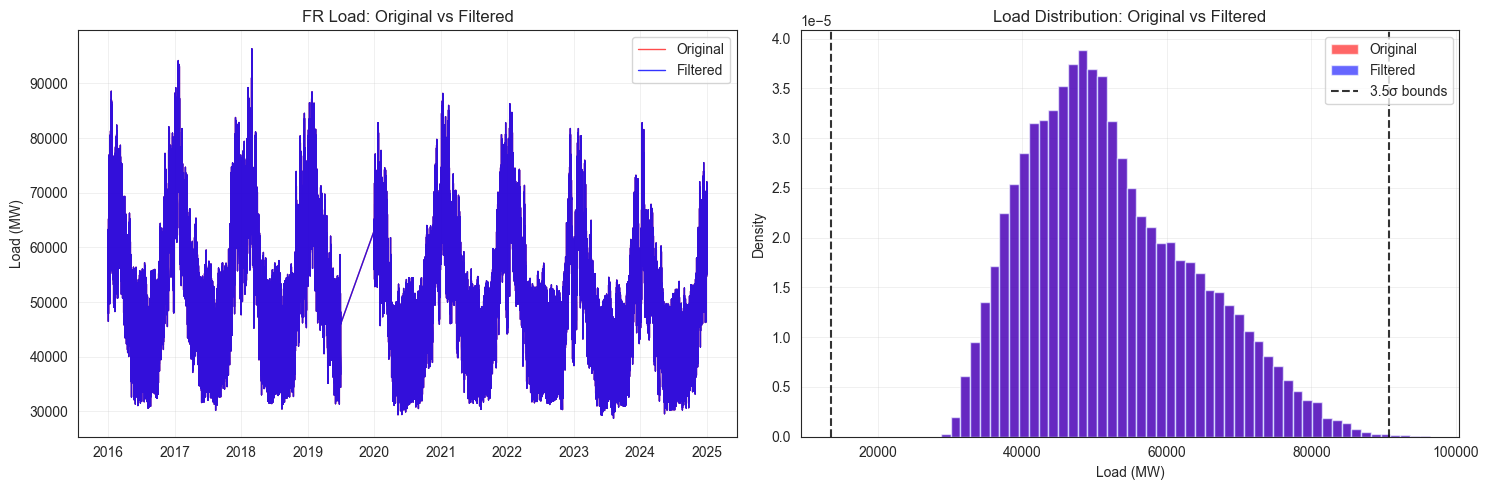

In [3]:
(country_load_value, date_list_load,
 country_load_original, abnormal_indices) = \
    load_and_filter_country_data(selected_country, year_list)

visualize_filtering_results(
    country_load_original, country_load_value,
    date_list_load, abnormal_indices, selected_country,
)

### 2.3 Load Calibrated Model & Prepare Features

In [ ]:
# Load calibrated demand model
demand_model_path = os.path.join(
    MODELS, 'demand_curve', selected_country,
    f'{selected_country}_{cali_year_list}_demand_curve.npy',
)
demand_curve = np.load(demand_model_path, allow_pickle=True).item()

# Prepare training features via the calibration pipeline
temp_data, wind_data, solar_data, humidity_data, date_list, pop_ratio = \
    load_weather_and_network_data(selected_country, year_list)

(load, delta_year, temp, wind, solar, humidity,
 weekday_index, weekend_index, hourly_load, valid_date,
 training_data_df) = prepare_training_data(
    selected_country, country_load_value, date_list_load, date_list,
    temp_data, wind_data, solar_data, humidity_data, pop_ratio,
)

print(f'Valid days: {len(load):,}  |  '
      f'Load range: {load.min():.1f}–{load.max():.1f} GW')

### 2.4 Demand Curve

  Weekday — MAPE: 0.0463, RMSE: 3.0311
  Weekend — MAPE: 0.0416, RMSE: 2.5240
  Overall — MAPE: 0.0448, RMSE: 2.8830


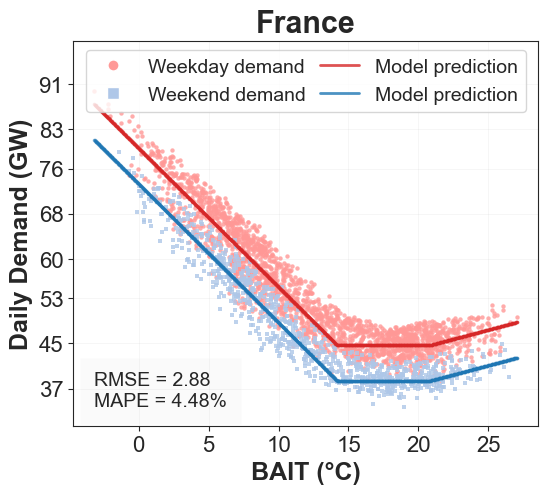

In [5]:
visualize_demand_curve(
    demand_curve, temp, wind, solar, humidity, delta_year,
    pop_ratio, load, weekday_index, selected_country,
    year_list, valid_date, show_legend=True, show_title=True,
)
plt.show()

### 2.5 Temperature vs BAIT Relationships

In [6]:
visualize_temp_bait_relationship(
    demand_curve, temp, wind, solar, humidity,
    pop_ratio, selected_country, year_list, valid_date,
)

## 3. Multi-Country Summary

### 3.1 Calibrated Parameters

In [9]:
print(f'{"Country":<8} {"Pb":>6} {"Ph":>6} {"Pc":>6} '
      f'{"Th":>6} {"Tc":>6} {"alpha":>7}')
print('-' * 50)
for cc in COUNTRIES:
    para = load_demand_profile(cc)
    print(f'{cc:<8} {para["Pb"]:6.2f} {para["Ph"]:6.2f} {para["Pc"]:6.2f} '
          f'{para["Th"]:6.2f} {para["Tc"]:6.2f} {para["alpha"]:7.2f}')

Country      Pb     Ph     Pc     Th     Tc   alpha
--------------------------------------------------
PT         4.75   0.17   0.17  15.65  19.14    0.90
ES        22.32   0.60   0.79  14.93  19.16    4.45
FR        38.38   2.46   0.66  14.19  20.82    6.32
IT        25.51   0.60   1.53  12.39  19.29    8.01
DE        44.56   0.64   0.67  15.10  22.28   11.53
BE         7.96   0.16   0.18  15.95  18.14    1.20
NL        10.71   0.17   0.15  14.87  17.76    1.66
GB        30.02   1.26   0.58  15.46  17.32    5.10


### 3.2 Multi-Country Demand Curves

Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_50_elec.nc


INFO:pypsa.io:Imported network base_s_50_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


  Weekday — MAPE: 0.0354, RMSE: 0.2828
  Weekend — MAPE: 0.0441, RMSE: 0.2853
  Overall — MAPE: 0.0381, RMSE: 0.2836


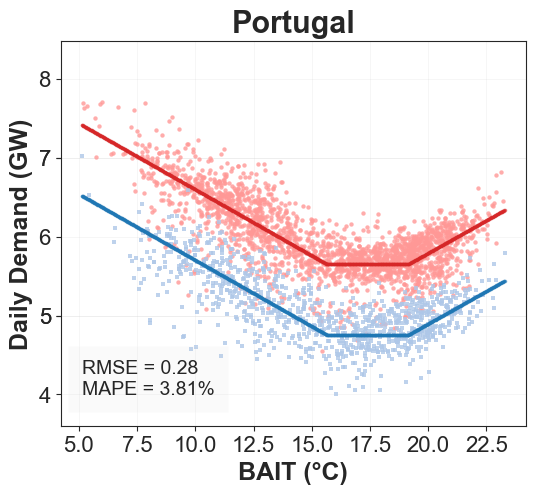

  Abnormal values (first 10): [4707.]
  Replaced with:              [20014.]
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_50_elec.nc


INFO:pypsa.io:Imported network base_s_50_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


  Weekday — MAPE: 0.0429, RMSE: 1.5454
  Weekend — MAPE: 0.0506, RMSE: 1.5586
  Overall — MAPE: 0.0452, RMSE: 1.5495


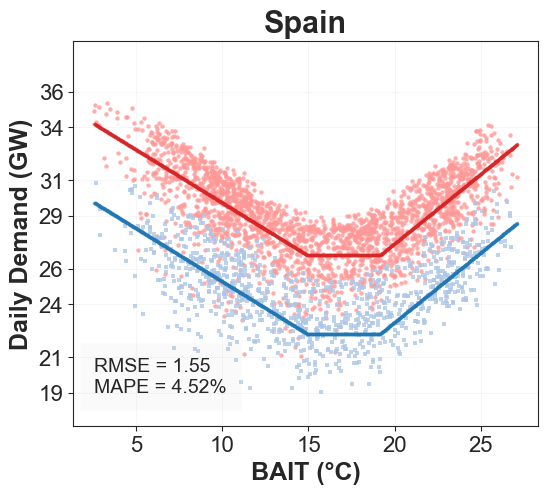

Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_50_elec.nc


INFO:pypsa.io:Imported network base_s_50_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


  Weekday — MAPE: 0.0463, RMSE: 3.0311
  Weekend — MAPE: 0.0416, RMSE: 2.5240
  Overall — MAPE: 0.0448, RMSE: 2.8830


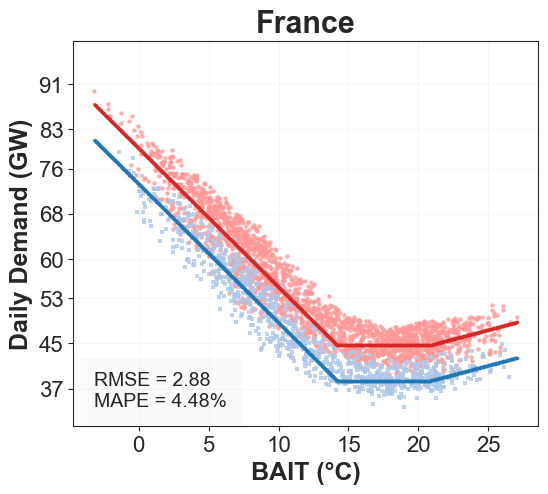

Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_50_elec.nc


INFO:pypsa.io:Imported network base_s_50_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


  Weekday — MAPE: 0.0789, RMSE: 3.5435
  Weekend — MAPE: 0.0870, RMSE: 2.9928
  Overall — MAPE: 0.0814, RMSE: 3.3835


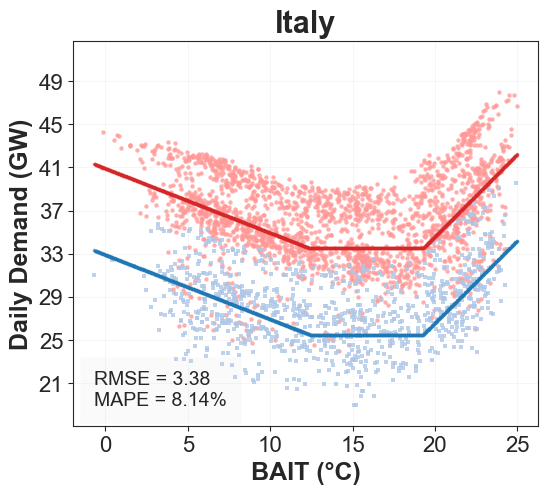

Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_50_elec.nc


INFO:pypsa.io:Imported network base_s_50_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


  Weekday — MAPE: 0.0447, RMSE: 3.3469
  Weekend — MAPE: 0.0480, RMSE: 2.9075
  Overall — MAPE: 0.0457, RMSE: 3.2187


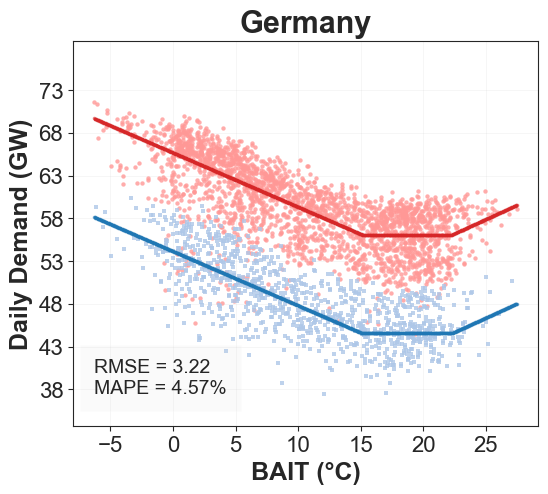

  Abnormal values (first 10): [2710. 2718. 2715. 2707. 2545. 2545. 2536. 2545. 2545. 2545.]
  Replaced with:              [10766. 10941. 11080. 10632. 10203. 10203. 10171.  8350.  9775. 10180.]
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_50_elec.nc


INFO:pypsa.io:Imported network base_s_50_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


  Weekday — MAPE: 0.0389, RMSE: 0.4864
  Weekend — MAPE: 0.0378, RMSE: 0.4160
  Overall — MAPE: 0.0385, RMSE: 0.4659


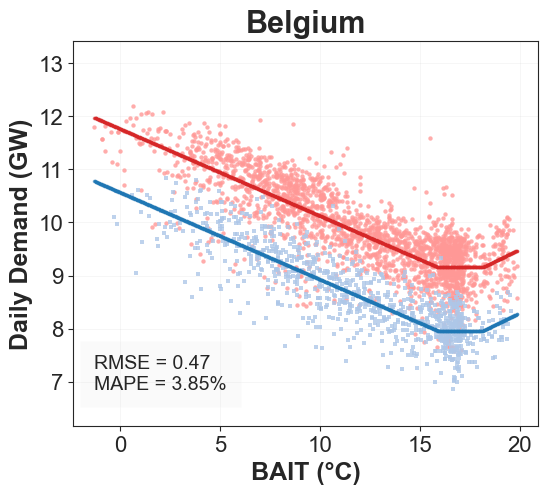

  Abnormal values (first 10): [5443.175  5383.185  5725.34   5644.5375 5632.295  5740.9325 5528.56
 5533.185 ]
  Replaced with:              [5867.0525 5867.0525 6571.4775 5977.765  5967.9025 6068.1175 6068.1175
 5975.545 ]
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_50_elec.nc


INFO:pypsa.io:Imported network base_s_50_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


  Weekday — MAPE: 0.0511, RMSE: 0.8223
  Weekend — MAPE: 0.0519, RMSE: 0.7620
  Overall — MAPE: 0.0513, RMSE: 0.8045


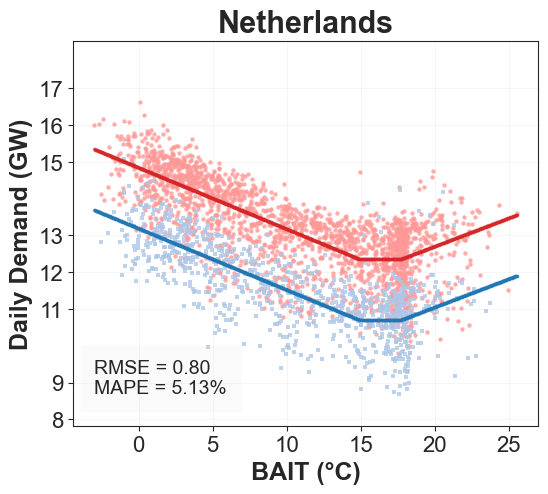

Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_50_elec.nc


INFO:pypsa.io:Imported network base_s_50_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


  Weekday — MAPE: 0.0805, RMSE: 3.9895
  Weekend — MAPE: 0.0728, RMSE: 3.2849
  Overall — MAPE: 0.0781, RMSE: 3.7892


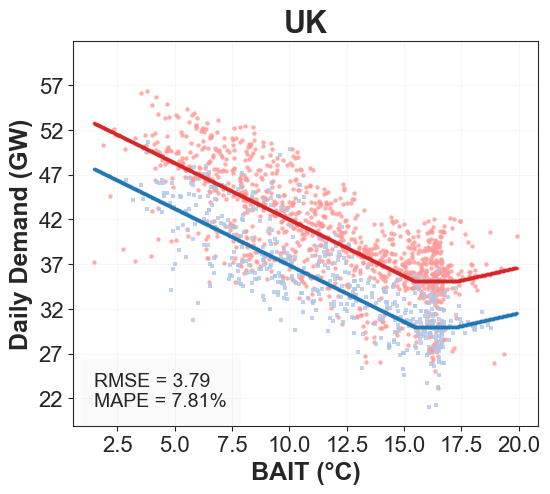

In [10]:
for cc in COUNTRIES:
    yl = [2015, 2020] if cc == 'GB' else [2015, 2024]

    # Load model
    model_path = os.path.join(
        MODELS, 'demand_curve', cc,
        f'{cc}_{yl}_demand_curve.npy',
    )
    para = np.load(model_path, allow_pickle=True).item()

    # Prepare data
    clv, dll, _, _ = load_and_filter_country_data(cc, yl)
    td, wd, sd, hd, dl, pr = load_weather_and_network_data(cc, yl)
    (ld, dy, t, w, s, h,
     wki, wke, hl, vd, _) = prepare_training_data(
        cc, clv, dll, dl, td, wd, sd, hd, pr)

    # Plot
    visualize_demand_curve(
        para, t, w, s, h, dy, pr, ld, wki, cc, yl, vd,
        show_legend=False, show_title=True,
    )
    models_dir = os.path.join(MODELS, 'demand_curve', cc)
    os.makedirs(models_dir, exist_ok=True)
    plt.savefig(
        os.path.join(models_dir, f'{cc}_{yl}_demand_curve.pdf'),
        dpi=300, bbox_inches='tight',
    )
    plt.show()

## 5. Standalone Legend

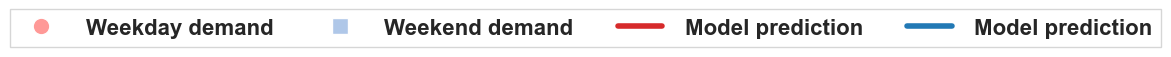

In [11]:
fig, ax = plt.subplots(figsize=(6, 0.1))

handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=lred,
           markersize=12, linewidth=0, alpha=0.99),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=lblue,
           markersize=12, linewidth=0, alpha=0.99),
    Line2D([0], [0], color=red, linewidth=4, alpha=0.99),
    Line2D([0], [0], color=blue, linewidth=4, alpha=0.99),
]
labels = ['Weekday demand', 'Weekend demand',
          'Model prediction', 'Model prediction']

legend = ax.legend(
    handles=handles, labels=labels, ncol=4, loc='center',
    fontsize=16, frameon=True, fancybox=False,
    handlelength=2.0, handletextpad=1,
)
for t in legend.texts:
    t.set_fontweight('bold')

ax.axis('off')
plt.tight_layout()
plt.savefig(
    MODELS + '/demand_curve/legend.pdf',
    format='pdf', dpi=300, bbox_inches='tight',
)
plt.show()

## 6. Network Generation Capacity Summary

Per-country breakdown of buses, lines, and installed generation capacity.

In [12]:
CONVENTIONAL = ['nuclear', 'oil', 'OCGT', 'CCGT', 'coal',
                'lignite', 'geothermal', 'biomass']
RENEWABLE = ['solar', 'onwind', 'offwind-ac', 'offwind-dc', 'hydro']

print(f'{"CC":<4} {"Buses":>5} {"Lines":>5} {"Conv":>5} {"Renew":>5} '
      f'{"Conv GW":>8} {"Renew GW":>9}')
print('-' * 50)

for cc in COUNTRIES:
    network, regions = load_network_EU([cc], RATIO)
    gens = network.generators

    con = gens[gens['carrier'].isin(CONVENTIONAL)]
    rew = gens[gens['carrier'].isin(RENEWABLE)]

    print(f'{cc:<4} {network.buses.shape[0]:5d} {network.lines.shape[0]:5d} '
          f'{con.shape[0]:5d} {rew.shape[0]:5d} '
          f'{con.p_nom.sum() / 1e3:8.2f} {rew.p_nom.sum() / 1e3:9.2f}')

CC   Buses Lines  Conv Renew  Conv GW  Renew GW
--------------------------------------------------
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_75_elec.nc


INFO:pypsa.io:Imported network base_s_75_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


PT      81   129    14    66     4.50      8.74
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_75_elec.nc


INFO:pypsa.io:Imported network base_s_75_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


ES     281   442    91   339    39.99     67.89
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_75_elec.nc


INFO:pypsa.io:Imported network base_s_75_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


FR     439   711    53   652    64.17     37.99
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_75_elec.nc


INFO:pypsa.io:Imported network base_s_75_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


IT     373   522    93   622    47.62     32.55
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_75_elec.nc


INFO:pypsa.io:Imported network base_s_75_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


DE     484   682   792   936    72.37    117.59
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_75_elec.nc


INFO:pypsa.io:Imported network base_s_75_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


BE      42    50    23    82    10.79      9.88
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_75_elec.nc


INFO:pypsa.io:Imported network base_s_75_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


NL      34    41    30    64    17.57     21.87
Loading EU network from: /Users/liangenming/Desktop/Code/Power-System-Evaluation/HeatAnalysis/data/EU/networks/base_s_75_elec.nc


INFO:pypsa.io:Imported network base_s_75_elec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


GB     319   426    90   451    49.91     51.54
